## Diamonds | datamad1022

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as p
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import expon
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = None

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import pickle

In [3]:
df = pd.read_csv("../../data/train.csv", sep=',', encoding='UTF-8')

In [4]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96,8.726


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


Vemos si hay nulos en el data set:

In [6]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
## There are no nulls

We check for duplicates in the data set:

In [8]:
df.duplicated().sum()

0

In [9]:
## There aren't duplicates

## Response Variable

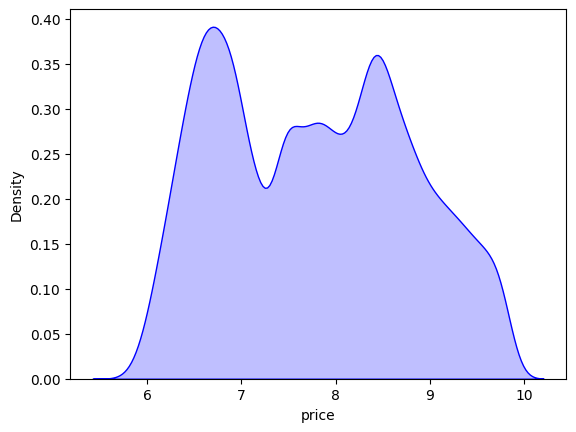

In [10]:
# let's see visually how the response variable is distributed.

sns.distplot(
    df.price, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

## Predicted variables

### Numerical variables

In [11]:
# we explore what are the main statistics of the numerical variables

df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
id,40455.0,20227.000000,11678.496907,0.000,10113.500,20227.00,30340.500,40454.000
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


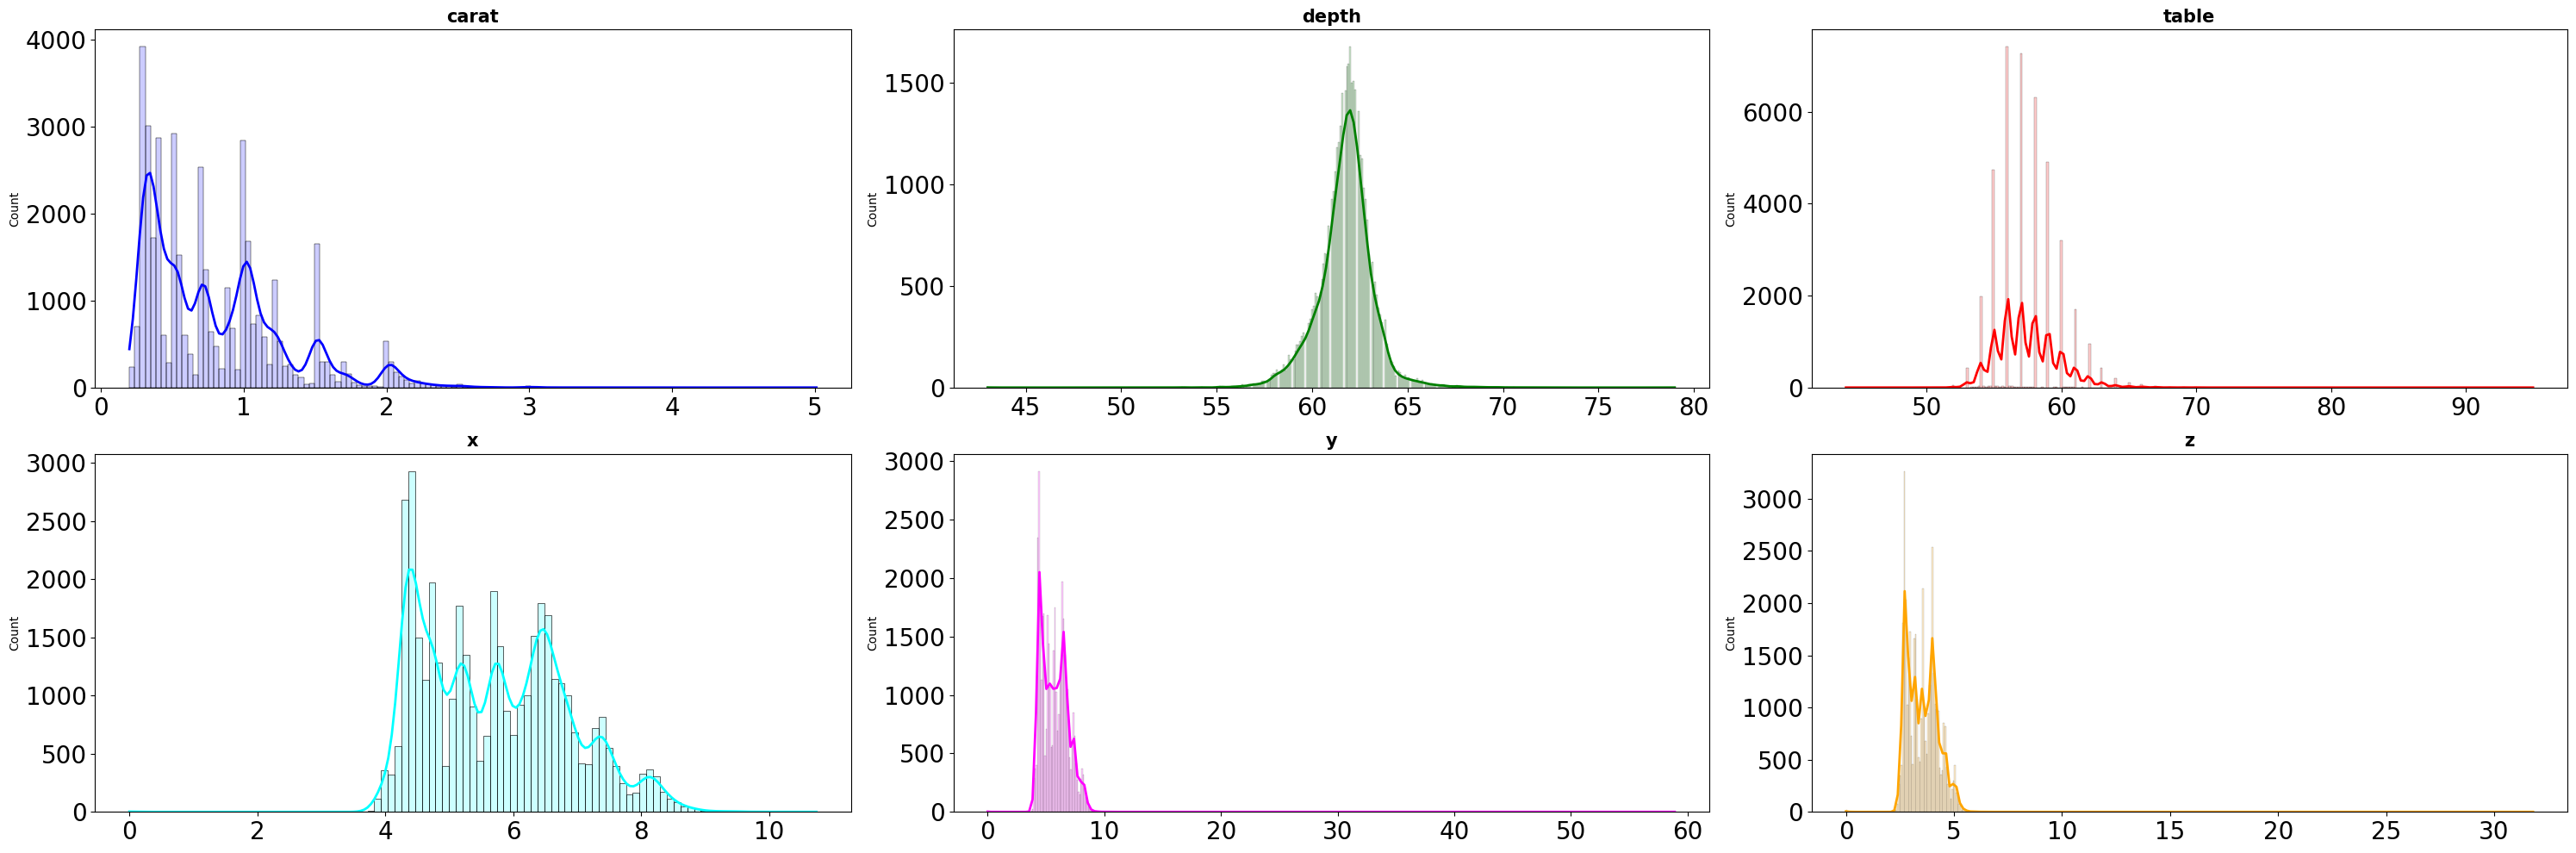

In [12]:
# Distribution chart for each numerical variable
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))
#sharey

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include=np.number).columns.difference(["price", "id"])

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

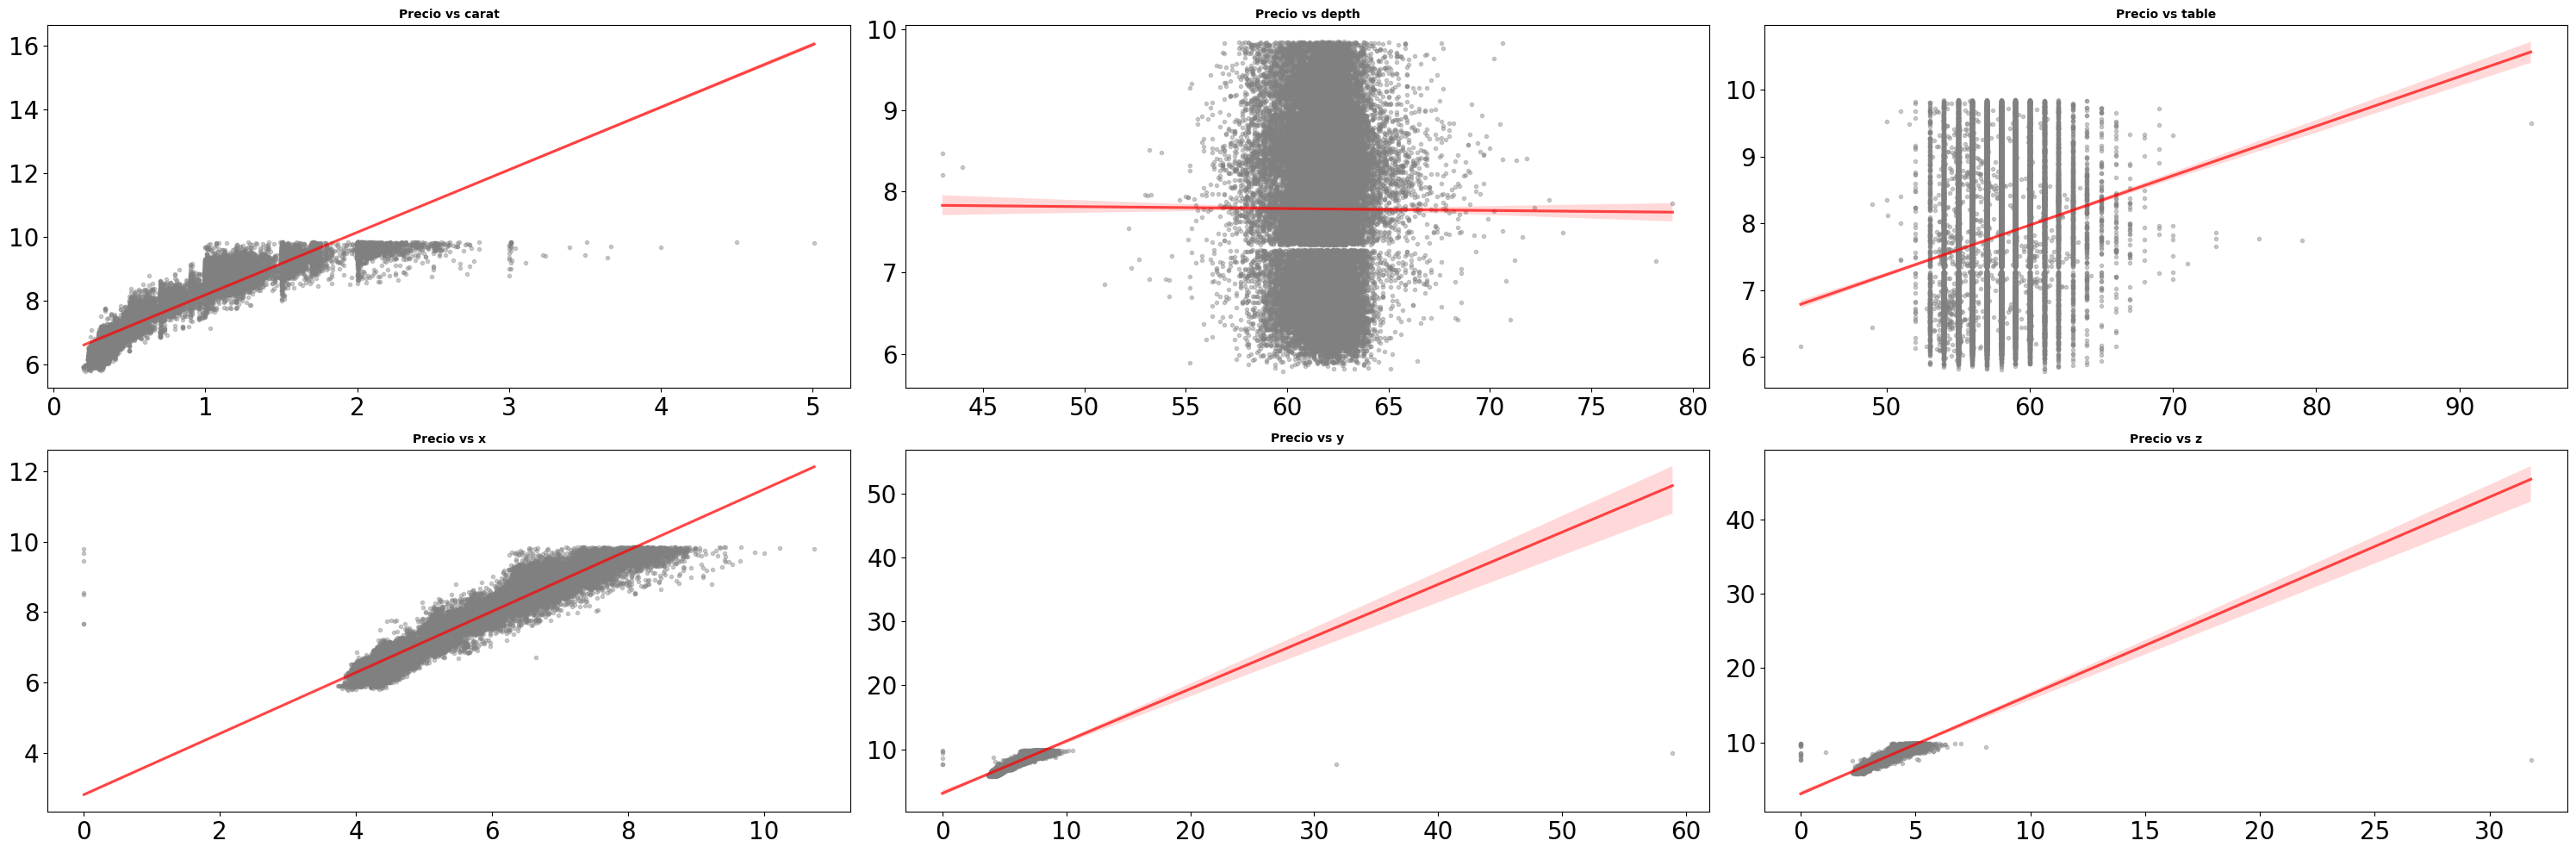

In [13]:
# Graph of relationship between predictor variables and the variable to be predicted 
# ==============================================================================


fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include=np.number).columns.difference(["price", "id"])

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

### Correlation between numerical variables

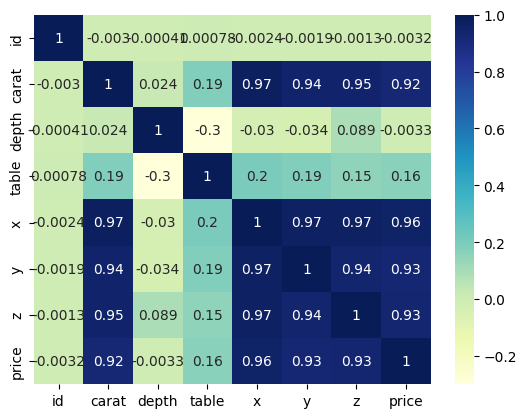

In [14]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

We see that there are certain variables of the df that have a very high correlation, these are carat, x, y & z. The variables , y, z are variables that are already indirectly found in the depth variable --> total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79), so we are going to eliminate them from our df to make the prediction.

In [15]:
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

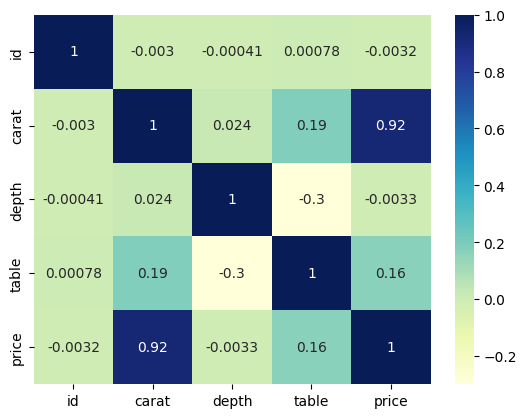

In [16]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

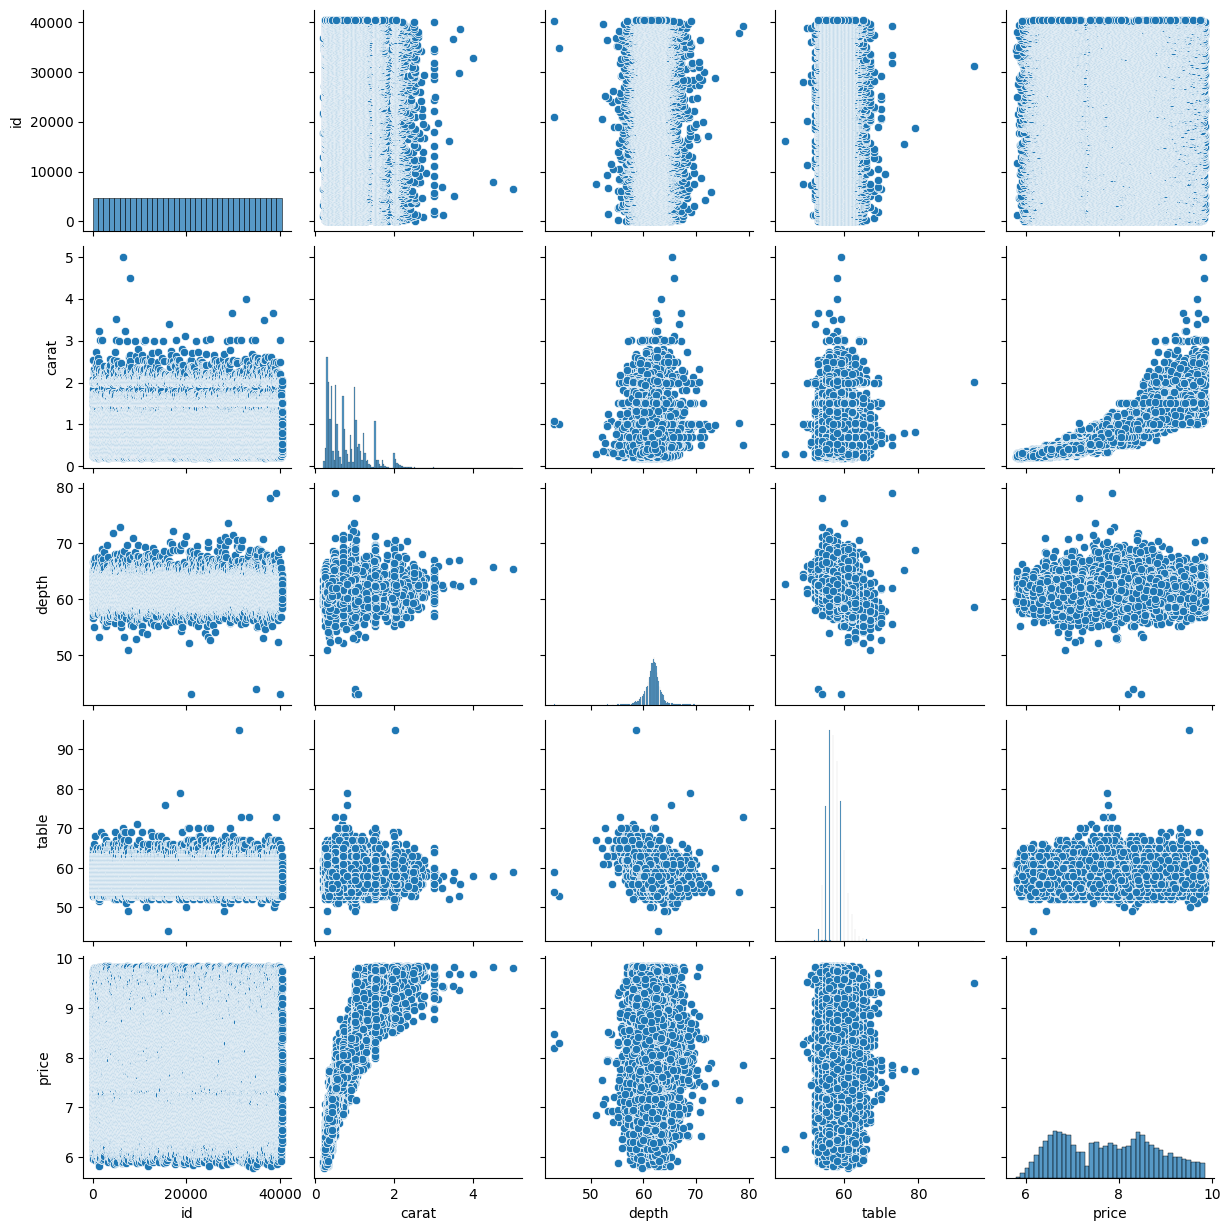

In [17]:
sns.pairplot(data= df)

### Categorical variable

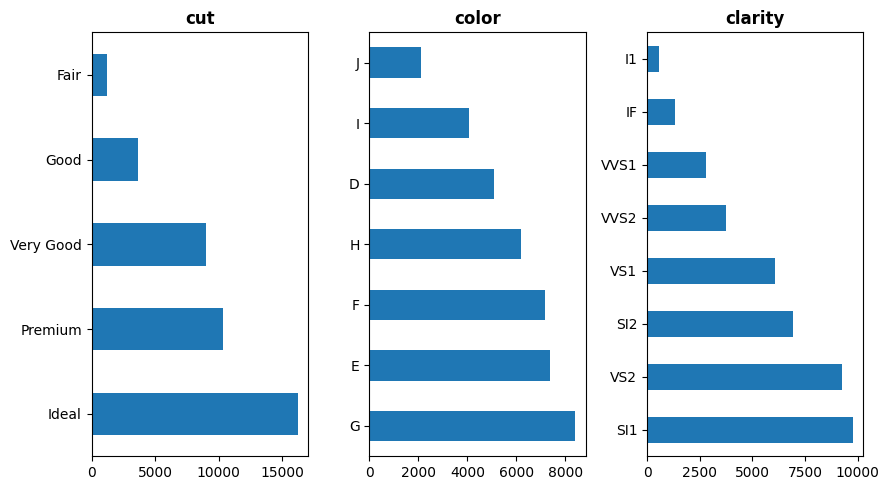

In [18]:
# Gráfico para cada variable cualitativa
# ==============================================================================

fig, axes = plt.subplots(1, 3, figsize = (9,5))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();


## Management of Outliers

In [19]:
# we select only those numerical variables

df_numericas = df.select_dtypes(include=np.number)

In [20]:
df_numericas.head(2)

,id,carat,depth,table,price
0,0,0.30,62.4,58.0,6.353
1,1,1.01,62.7,56.0,9.183


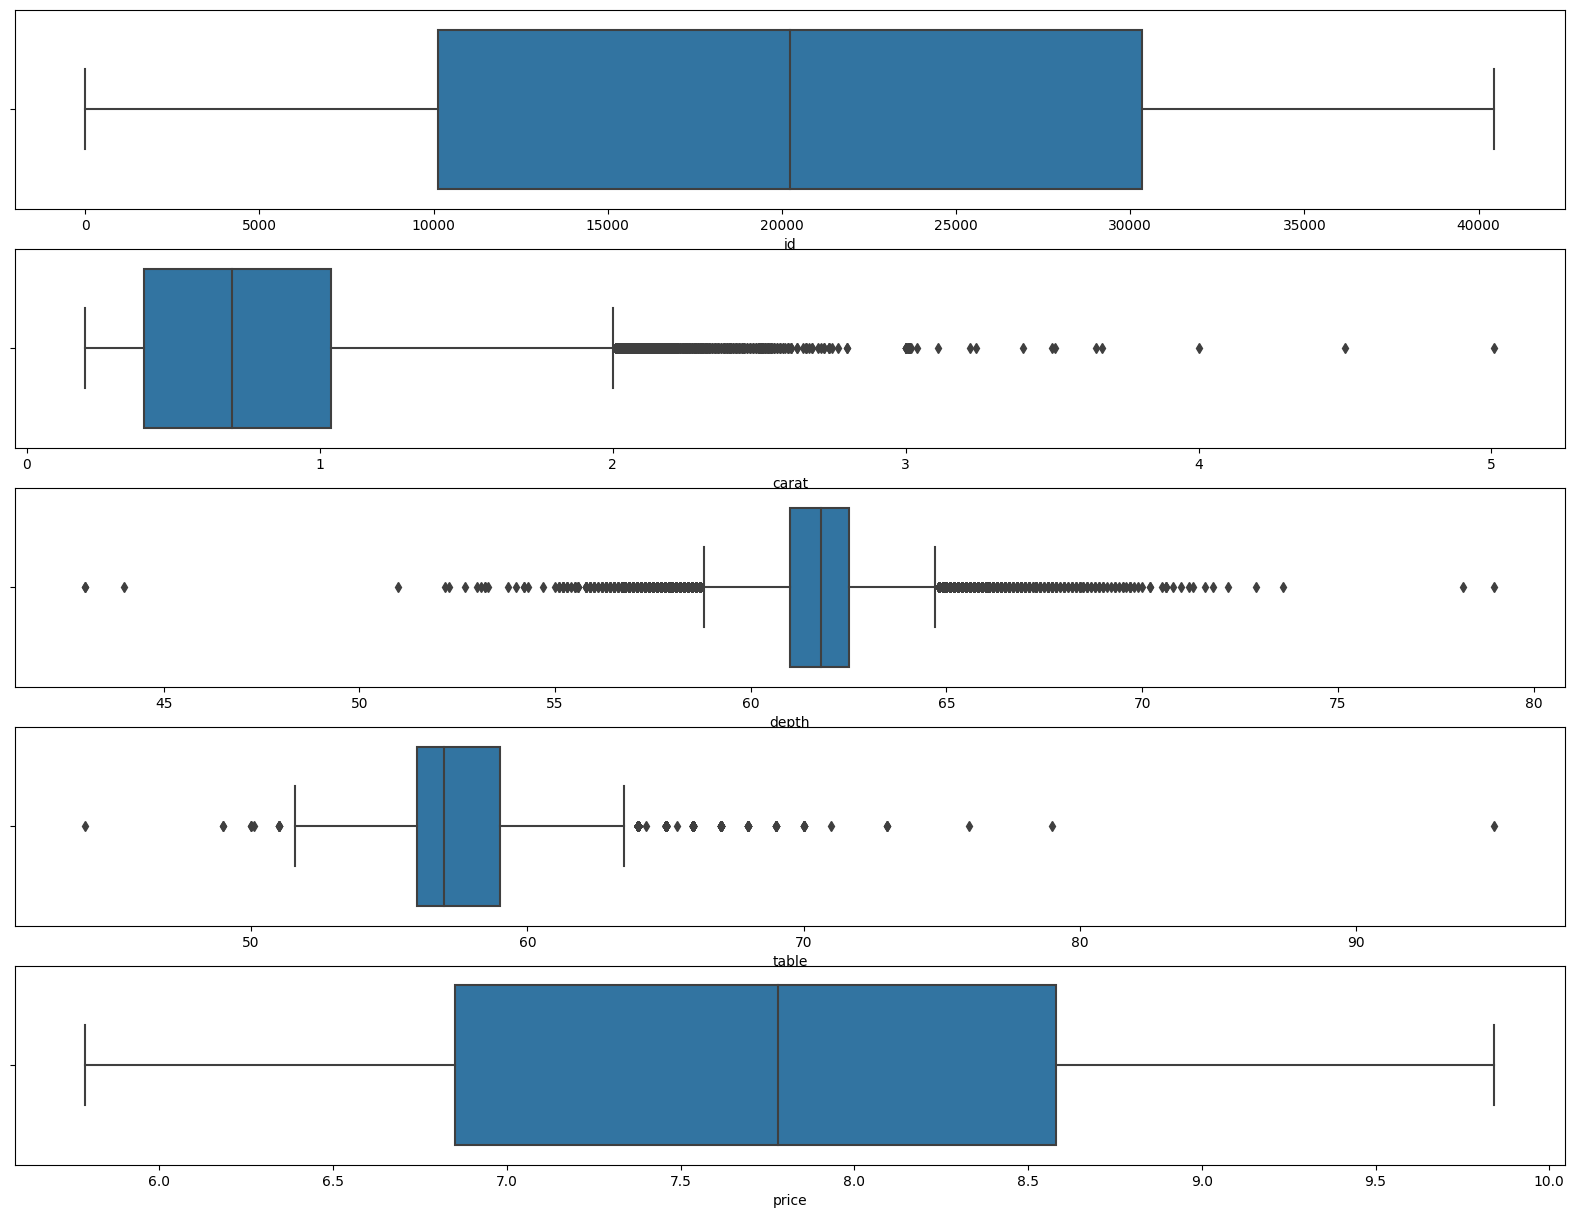

In [23]:
fig, ax = plt.subplots(5, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

We start with the variable carat:

In [24]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    
    for col in lista_columnas:
        
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: 
        
            dicc_indices[col] = (list(outliers_data.index))

    
    return dicc_indices 


In [25]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['id', 'carat', 'depth', 'table', 'price'], dtype='object')

In [26]:
# we apply the function and extract the outliers indexes.
ind = detectar_outliers(lista_columnas, df)

I replace the otliers by the median (the mean would not be a bad choice, it looks pretty close to the median):

In [27]:
for k, v in ind.items():
    mediana = df_numericas[k].median() 
    for i in v: 
        df_numericas.loc[i,k] = mediana 

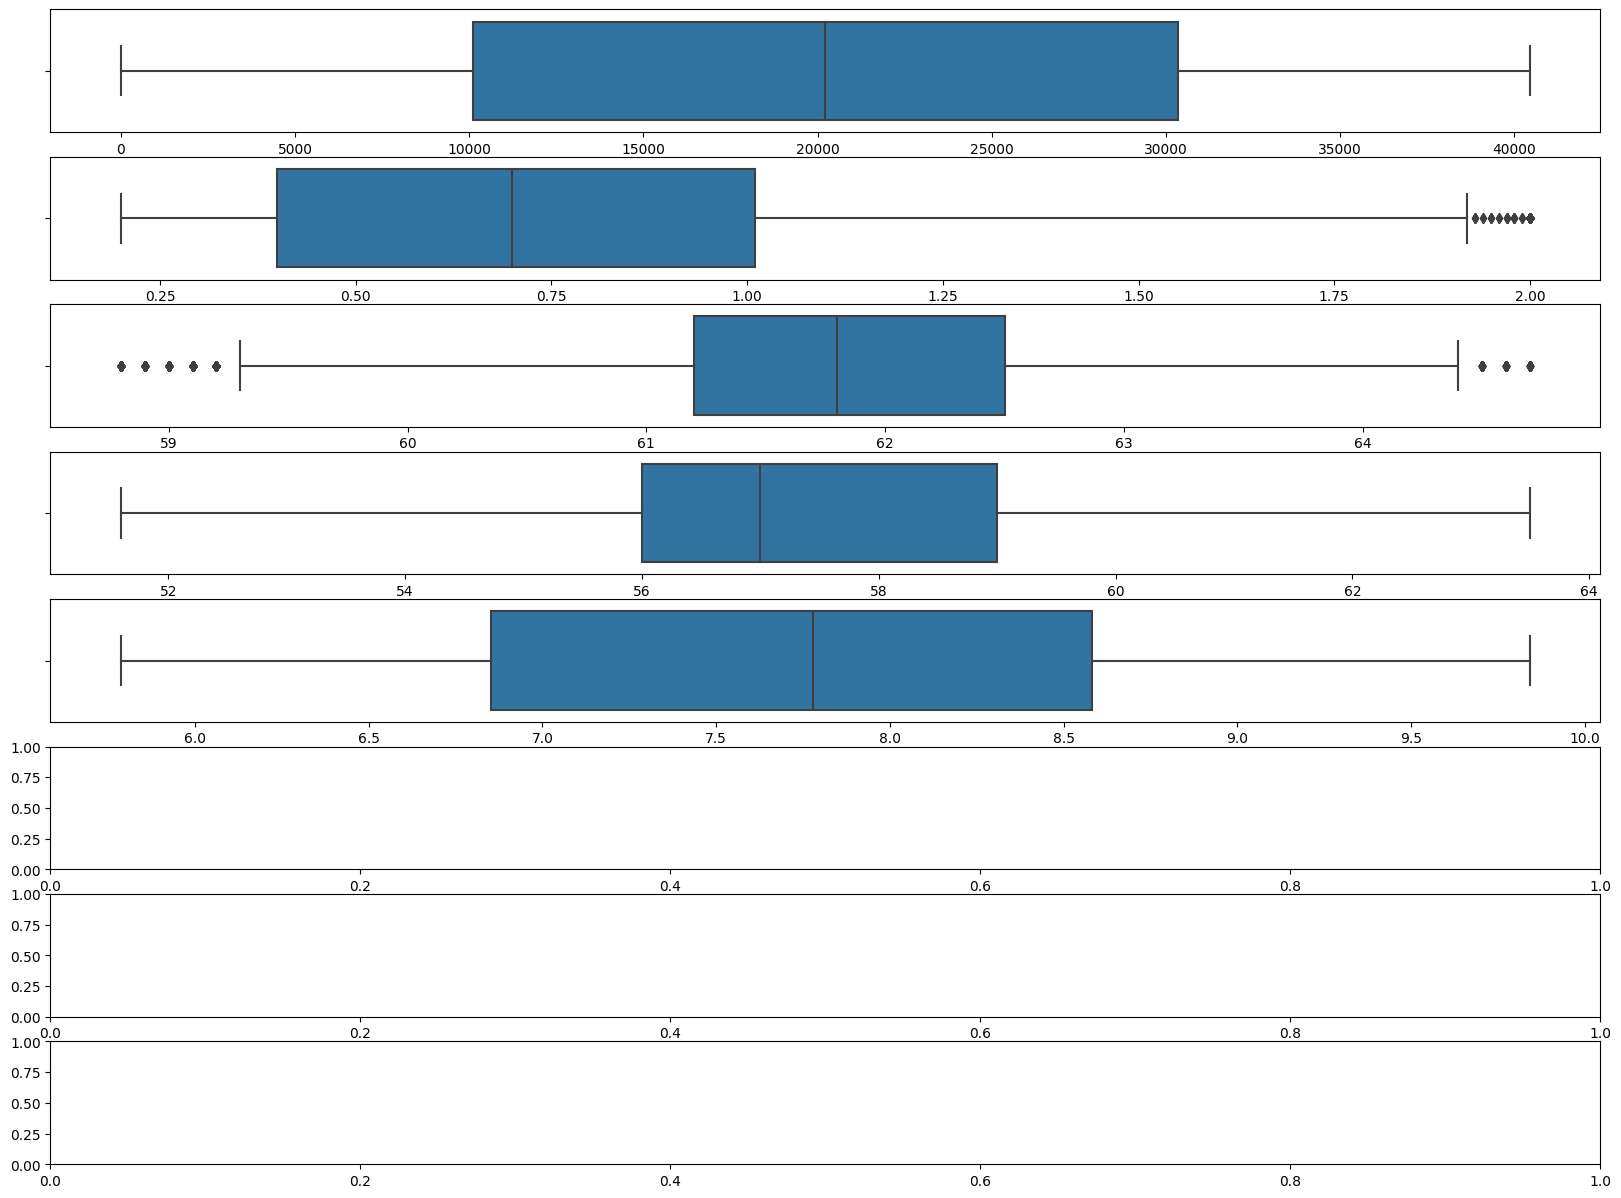

In [28]:
fig, ax = plt.subplots(8, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

There are still outliers:

In [29]:
ind2 = detectar_outliers(lista_columnas, df_numericas)
print(ind2)

{'carat': [132, 348, 389, 478, 683, 1099, 1179, 1268, 1360, 2183, 2376, 2548, 2859, 2980, 3044, 3168, 3252, 3490, 3520, 3657, 3983, 4105, 4410, 4497, 4928, 5204, 5434, 5501, 5643, 5741, 5824, 5982, 6058, 6067, 6170, 6227, 6590, 6622, 6917, 6930, 7204, 7310, 7472, 7761, 7836, 7858, 7952, 8051, 8266, 8317, 8363, 8473, 8579, 8629, 9174, 9236, 9493, 9722, 9731, 9763, 10202, 10459, 10526, 10629, 10998, 11074, 11269, 11681, 11791, 11931, 12456, 12895, 13188, 13596, 13872, 13901, 13930, 14080, 14088, 14259, 14745, 14811, 14904, 14985, 15462, 15538, 15749, 16246, 16263, 16495, 16601, 16845, 16996, 17303, 17626, 17641, 17723, 18229, 18931, 18936, 19098, 19204, 19564, 19709, 19784, 19847, 20274, 20423, 20472, 20500, 20579, 20684, 20911, 20949, 21164, 21528, 21571, 21622, 21953, 21984, 22156, 22289, 22397, 22423, 22440, 22832, 22977, 23110, 23173, 23445, 23453, 23729, 23770, 24304, 24446, 24479, 24741, 24936, 25137, 25236, 25302, 25894, 26002, 26069, 26236, 26456, 26525, 26712, 26735, 26778, 2688

We are going to eliminate them:

In [30]:
valores = list(ind2.values())
valores = [indice for sublista in valores for indice in sublista]
df.shape

(40455, 8)

In [31]:
final = df_numericas.drop(df_numericas.index[list(valores)] )
final.shape

(39193, 5)

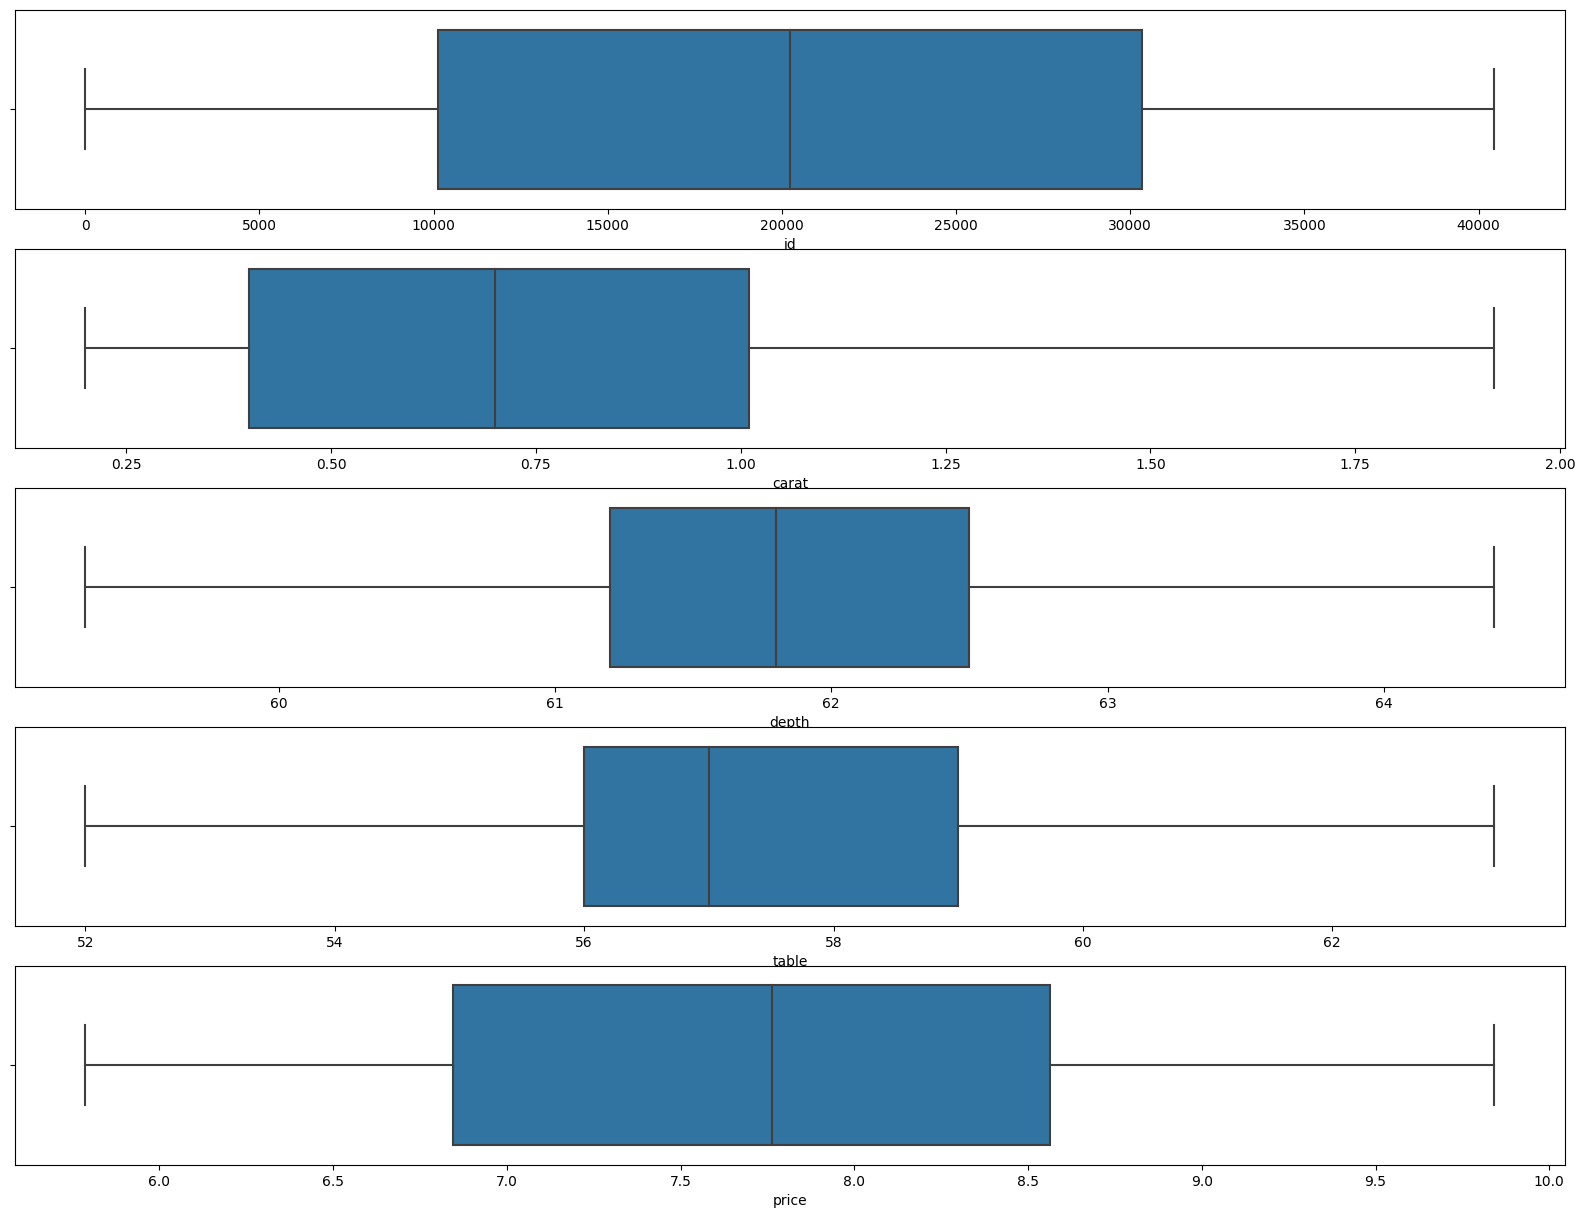

In [33]:
fig, ax = plt.subplots(5, 1, figsize=(20,15))

for i in range(len(final.columns)):
    sns.boxplot(x=final.columns[i], data=final, ax=ax[i])
plt.show()

In [34]:
df_clean = final.merge(df[['id', 'cut', 'color', 'clarity']], on='id', how='left')

In [35]:
df_clean.head()

,id,carat,depth,table,price,cut,color,clarity
0,0,0.30,62.4,58.0,6.353,Premium,D,SI2
1,1,1.01,62.7,56.0,9.183,Ideal,E,VVS2
2,2,0.72,61.8,59.0,7.983,Ideal,F,VS2
3,3,1.08,63.2,57.0,8.371,Very Good,G,SI2
4,4,0.36,62.3,59.0,6.588,Premium,G,VS1


In [36]:
df_clean.to_csv("df_sin_outliers.csv")

# What is the distribution of our data? 

In [37]:
columnas = final.columns
columnas

Index(['id', 'carat', 'depth', 'table', 'price'], dtype='object')

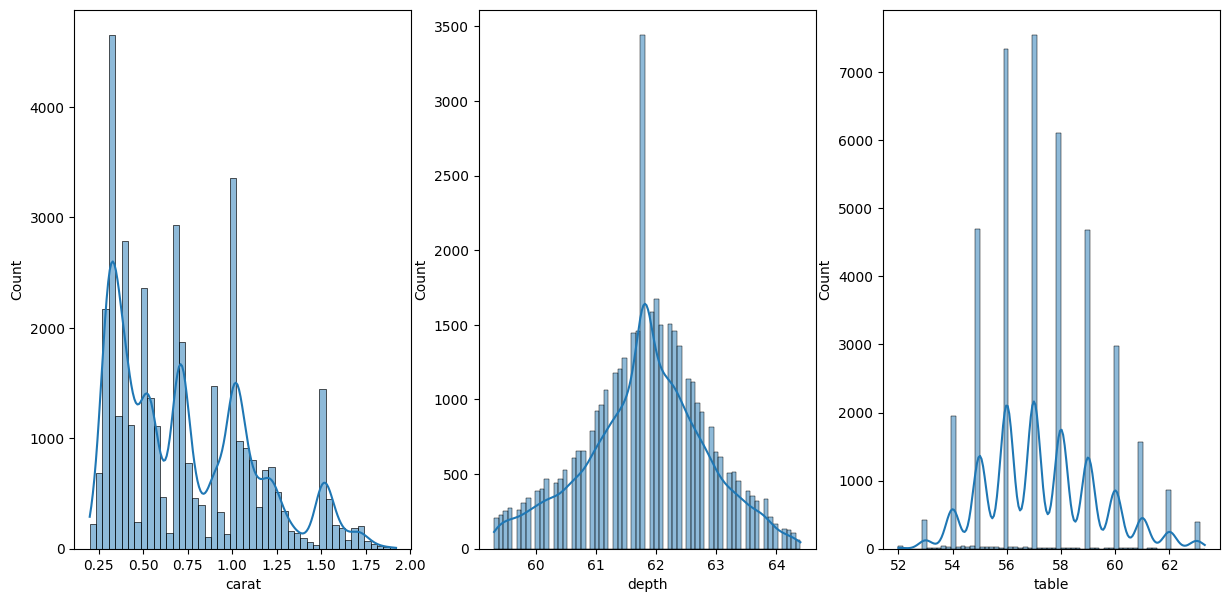

In [40]:
columnas = final.columns.drop('id')  # Excluye la columna 'id' de la lista de columnas

fig, ax = plt.subplots(1,4, figsize = (20,7))
ax = ax.flat

for i, columna in enumerate(columnas):
    sns.histplot(data=final, x=columna, kde=True, ax=ax[i])

fig.delaxes(ax[-1])
plt.show()

In [41]:
stats.shapiro(final["price"])

ShapiroResult(statistic=0.962773323059082, pvalue=0.0)

In the case of ShapiroResult(statistic=0.9629329442977905, pvalue=0.0), the p-value is zero, which means that there is significant evidence to reject the null hypothesis that the data follow a normal distribution. Therefore, it is concluded that the data do not follow a normal distribution. 

## STANDARDIZATION

Now we have to standardize the numerical variables:

In [42]:
df_clean.select_dtypes(include=np.number).columns.drop('id')

Index(['carat', 'depth', 'table', 'price'], dtype='object')

In [43]:
scaler=StandardScaler()

In [46]:
scaler.fit(df_clean[['carat', 'depth', 'table']])
X_escaladas = scaler.transform(df_clean[['carat', 'depth', 'table']])
df_clean[['carat', 'depth', 'table']] = X_escaladas
df_clean.head()

,id,carat,depth,table,price,cut,color,clarity
0,0,-1.133156,0.576399,0.334662,6.353,Premium,D,SI2
1,1,0.710932,0.873910,-0.643644,9.183,Ideal,E,VVS2
2,2,-0.042287,-0.018623,0.823815,7.983,Ideal,F,VS2
3,3,0.892744,1.369761,-0.154491,8.371,Very Good,G,SI2
4,4,-0.977317,0.477228,0.823815,6.588,Premium,G,VS1


In [47]:
# pickle

import pickle

with open('estandarizacion.pkl', 'wb') as s:
    pickle.dump(scaler, s)

## ENCODING

In [48]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

In [49]:
columnas_object = df_clean.select_dtypes(include="object")
columnas_object.head()

,cut,color,clarity
0,Premium,D,SI2
1,Ideal,E,VVS2
2,Ideal,F,VS2
3,Very Good,G,SI2
4,Premium,G,VS1


We use the label enconder to specify the categorical variables that do have a specific order:

In [50]:
le = LabelEncoder()

In [53]:
def label_encoder(df, columnas):
    for col in df[columnas].columns:
        nuevo_nombre = col + "_encoded"
        df[nuevo_nombre] = le.fit_transform(df[col])
    return df

In [54]:
df_encoded = df_clean.copy()
df_encoded = label_encoder(df_encoded, ["cut", "color","clarity"])
df_encoded.head()

,id,carat,depth,table,price,cut,color,clarity,cut_encoded,color_encoded,clarity_encoded
0,0,-1.133156,0.576399,0.334662,6.353,Premium,D,SI2,3,0,3
1,1,0.710932,0.873910,-0.643644,9.183,Ideal,E,VVS2,2,1,7
2,2,-0.042287,-0.018623,0.823815,7.983,Ideal,F,VS2,2,2,5
3,3,0.892744,1.369761,-0.154491,8.371,Very Good,G,SI2,4,3,3
4,4,-0.977317,0.477228,0.823815,6.588,Premium,G,VS1,3,3,4


In [55]:
df_encoded.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)
df_encoded.head()

,id,carat,depth,table,price,cut_encoded,color_encoded,clarity_encoded
0,0,-1.133156,0.576399,0.334662,6.353,3,0,3
1,1,0.710932,0.873910,-0.643644,9.183,2,1,7
2,2,-0.042287,-0.018623,0.823815,7.983,2,2,5
3,3,0.892744,1.369761,-0.154491,8.371,4,3,3
4,4,-0.977317,0.477228,0.823815,6.588,3,3,4


Encoding del test:

In [56]:
df_test = pd.read_csv("../../data/test.csv", sep=',', encoding='UTF-8')
df_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67


In [58]:
df_test.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [59]:
df_test.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table'], dtype='object')

In [60]:
df_test = label_encoder(df_test, ['cut', 'color','clarity'])

In [61]:
df_test.head()

,id,carat,cut,color,clarity,depth,table,cut_encoded,color_encoded,clarity_encoded
0,0,0.32,Ideal,I,SI1,60.5,58.0,2,5,2
1,1,1.24,Premium,I,SI1,62.9,60.0,3,5,2
2,2,1.66,Premium,D,SI1,62.0,59.0,3,0,2
3,3,0.75,Premium,D,SI2,60.6,56.0,3,0,3
4,4,1.50,Fair,E,SI2,64.8,55.0,0,1,3


In [62]:
df_test.shape

(13485, 10)

In [63]:
df_test.to_csv('df_test.csv', index=False)

### Separation test-train

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


In [66]:
X = df_encoded.drop('price', axis =1)
y = df_encoded['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [67]:
X_train

,id,carat,depth,table,cut_encoded,color_encoded,clarity_encoded
23617,24380,-1.263021,-0.018623,0.334662,1,1,7
22531,23267,0.710932,0.179718,-0.154491,2,1,6
18131,18724,1.568044,0.378058,-0.643644,3,3,3
14188,14654,1.983613,-0.316134,0.334662,3,1,0
7545,7812,-0.353963,-1.208667,1.312968,4,5,5
...,...,...,...,...,...,...,...
6265,6485,-0.613694,-0.415304,0.334662,3,1,5
11284,11659,-0.795506,0.080547,-2.111103,2,3,1
38158,39369,2.009586,0.477228,-0.154491,2,4,4
860,895,0.425229,1.568102,1.312968,4,4,3


In [68]:
print(y_train.describe())

count    31354.000000
mean         7.770487
std          1.011742
min          5.787000
25%          6.847250
50%          7.767000
75%          8.565750
max          9.842000
Name: price, dtype: float64


In [69]:
print(y_test.describe())

count    7839.000000
mean        7.761364
std         1.010999
min         5.820000
25%         6.842000
50%         7.752000
75%         8.561500
max         9.842000
Name: price, dtype: float64


## Adjustment of the modelo

### DECISION TREE

In [70]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [71]:
# ajustamos el modelo
max_features = np.sqrt(len(X_train.columns))
max_features

2.6457513110645907

In [72]:
print(regressor.tree_.max_depth)

40


In [73]:
# predictions of X_test & X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [74]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [75]:
# overfitting?

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,1.354790e-01,8.650707e-02,2.941208e-01,0.915354,test,Decission Tree I
1,5.722142e-18,5.082283e-33,7.129013e-17,1.000000,train,Decission Tree I


In [76]:
# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 6, 8, 10, 12, 14, 16, 18],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [77]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [78]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_
best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=12, max_features=6, min_samples_split=100)

In [79]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [80]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.126680,0.054939,0.234390,0.946243,test,Decision tree II
1,0.120335,0.049414,0.222293,0.951724,train,Decision tree II


In [81]:
df_all = pd.concat([dt_results1, dt_results2], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,1.354790e-01,8.650707e-02,2.941208e-01,0.915354,test,Decission Tree I
1,5.722142e-18,5.082283e-33,7.129013e-17,1.000000,train,Decission Tree I
0,1.266798e-01,5.493872e-02,2.343901e-01,0.946243,test,Decision tree II
1,1.203347e-01,4.941435e-02,2.222934e-01,0.951724,train,Decision tree II


## Random Forest

In [83]:
param = {"max_depth": [4, 6, 8, 10, 12, 14, 16, 18],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

bosque = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")
bosque.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [84]:
bosque.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [85]:
bos = bosque.best_estimator_
bos

RandomForestRegressor(max_depth=14, max_features=4, min_samples_split=10)

### Predicción

In [86]:
y_pred_test_rf = bos.predict(X_test)
y_pred_train_rf = bos.predict(X_train)

In [87]:
rf_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.110203,0.047177,0.217202,0.953838,test,Random Forest
1,0.088945,0.029415,0.171508,0.971263,train,Random Forest


In [88]:
df_all = pd.concat([df_all, rf_results ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,1.354790e-01,8.650707e-02,2.941208e-01,0.915354,test,Decission Tree I
1,5.722142e-18,5.082283e-33,7.129013e-17,1.000000,train,Decission Tree I
0,1.266798e-01,5.493872e-02,2.343901e-01,0.946243,test,Decision tree II
1,1.203347e-01,4.941435e-02,2.222934e-01,0.951724,train,Decision tree II
0,1.102032e-01,4.717666e-02,2.172019e-01,0.953838,test,Random Forest
1,8.894515e-02,2.941484e-02,1.715076e-01,0.971263,train,Random Forest


## KNeighborsRegressor

In [89]:
knn_scores = []

for k in range(1,21):

    score=cross_val_score(KNeighborsRegressor(n_neighbors = k),
                          X = X,
                          y = y,
                          cv=10, 
                         scoring = "neg_mean_squared_error")
    knn_scores.append(score.mean())

In [90]:
knn = pd.DataFrame(knn_scores, range(1,21)).reset_index()
knn.columns = ["number_neighbors", "score"]
knn.sort_values(by = "score", ascending = False).head(3)

,number_neighbors,score
19,20,-1.055522
18,19,-1.061558
17,18,-1.066130


In [91]:
knn = KNeighborsRegressor(n_neighbors =2)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [92]:
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

In [93]:
results_knn = metricas(y_test, y_train, y_pred_knn_test, y_pred_knn_train, "KNN")
df_all = pd.concat([df_all, results_knn ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,1.354790e-01,8.650707e-02,2.941208e-01,0.915354,test,Decission Tree I
1,5.722142e-18,5.082283e-33,7.129013e-17,1.000000,train,Decission Tree I
0,1.266798e-01,5.493872e-02,2.343901e-01,0.946243,test,Decision tree II
1,1.203347e-01,4.941435e-02,2.222934e-01,0.951724,train,Decision tree II
0,1.102032e-01,4.717666e-02,2.172019e-01,0.953838,test,Random Forest
1,8.894515e-02,2.941484e-02,1.715076e-01,0.971263,train,Random Forest
0,1.102032e-01,4.717666e-02,2.172019e-01,0.953838,test,KNN
1,8.894515e-02,2.941484e-02,1.715076e-01,0.971263,train,KNN


## Gradient Boosting

In [94]:
param = {"max_depth": [2,3, 4,6,8],
         "min_samples_split": [50, 100, 150, 200, 250],
         "max_features": [1,2,3,4], 
         "min_samples_leaf": [100, 150, 200, 250]}

grid = GridSearchCV(
        estimator  = GradientBoostingRegressor(),
        param_grid = param,
        cv=10,
        verbose=0,
        n_jobs = -1,
        return_train_score = True,
        scoring="neg_mean_squared_error")
       

grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6, 8],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [100, 150, 200, 250],
                         'min_samples_split': [50, 100, 150, 200, 250]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [95]:
grid.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 100}

In [96]:
y_pred_gb_test= grid.predict(X_test)
y_pred_gb_train= grid.predict(X_train)

In [97]:
results_gradient = metricas(y_test, y_train, y_pred_gb_test, y_pred_gb_train, "Gradient")
df_all = pd.concat([df_all, results_gradient ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,1.354790e-01,8.650707e-02,2.941208e-01,0.915354,test,Decission Tree I
1,5.722142e-18,5.082283e-33,7.129013e-17,1.000000,train,Decission Tree I
0,1.266798e-01,5.493872e-02,2.343901e-01,0.946243,test,Decision tree II
1,1.203347e-01,4.941435e-02,2.222934e-01,0.951724,train,Decision tree II
0,1.102032e-01,4.717666e-02,2.172019e-01,0.953838,test,Random Forest
1,8.894515e-02,2.941484e-02,1.715076e-01,0.971263,train,Random Forest
0,1.102032e-01,4.717666e-02,2.172019e-01,0.953838,test,KNN
1,8.894515e-02,2.941484e-02,1.715076e-01,0.971263,train,KNN
0,1.102032e-01,4.717666e-02,2.172019e-01,0.953838,test,Gradient
1,8.894515e-02,2.941484e-02,1.715076e-01,0.971263,train,Gradient


In [98]:
with open('mejor_modelo.pkl', 'wb') as modelo:
        pickle.dump(grid, modelo)